<a href="https://colab.research.google.com/github/ssmirnov4/regression/blob/main/harvest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 4

# Многомерная регрессия



**Цель работы:** изучение принципов решения задачи многомерной регрессии с использованием методов машинного обучения

Набор данных включает исторические данные о погоде, свойствах
почвы и урожайности сельскохозяйственных культур, что позволяет исследователям
и разработчикам создавать надежные модели прогнозирования урожайности. Содержит следующие атрибуты:
* **Nitrogen** – отношение содержания азота в почве
* **Phosphorus** – отношение содержания фосфора в почве
* **Potassium** – отношение содержания калия в почве
* **Temperature** – температура в градусах Цельсия
* **Humidity** – относительная влажность в %
* **pH_Value** – значение pH почвы
* **Rainfall** – количество осадков в мм
* **Crop** – культура
* **Yield** – урожай

### 1. Импортируем необходимые библиотеки и загружаем необходимые данные

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('crop_yield.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


### 2. Получим информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


### 3. Проверяем наличие пропущенных значений и выбросов

In [ ]:
print(df.isnull().sum())

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64


### 4. Заменяем категориальные значения числовыми

In [ ]:
unique_values = df['Crop'].unique()

print(unique_values)

['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']


In [ ]:
df['Crop'] = df['Crop'].map({
    'Rice': 1,
    'Maize': 2,
    'ChickPea': 3,
    'KidneyBeans': 4,
    'PigeonPeas': 5,
    'MothBeans': 6,
    'MungBean': 7,
    'Blackgram': 8,
    'Lentil':9,
    'Pomegranate': 10,
    'Banana': 11,
    'Mango': 12,
    'Grapes': 13,
    'Watermelon': 14,
    'Muskmelon':15,
    'Apple': 16,
    'Orange': 17,
    'Papaya': 18,
    'Coconut': 19,
    'Cotton': 20,
    'Jute': 21,
    'Coffee': 22
}).astype('int')



In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int64  
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 154.8 KB


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,120000


### 5. Разделяем данные на признаки и целевую переменную

In [ ]:
y = df['Yield']
X = df.drop('Yield', axis=1)

In [ ]:
# убедимся, что данные в нужном нам формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
# посмотрим на признаки
X.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


### 6. Разделяем данные на обучающую и тестовую выборку

75% данных используется для обучения и 25% — для тестирования.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 7. Применяем операцию нормализации для численной устойчивости

In [ ]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

### 8. Масштабируем признаки обучающей выборки

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

# убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([ 50.61939394,  53.49757576,  48.11818182,  25.47893947,
         71.47902935,   6.47360345, 103.54167637,  11.55333333]),
 array([36.99768199, 33.11949431, 50.92598286,  4.99011963, 22.16844403,
         0.76000642, 55.3520035 ,  6.33421716]))

### 9. Обучаем модель линейной регрессии

In [ ]:

# импортируем класс для создания модели линейной регрессии
from sklearn.linear_model import LinearRegression

# применим масштабированные данные для обучения модели линейной регрессии
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

### 10. Делаем прогноз на основе данных тестирования

In [ ]:

# преобразуем тестовые данные с использованием среднего и СКО, рассчитанных на обучающей выборке
# так тестовые данные не повляют на обучение модели, и мы избежим утечки данных
X_test_scaled = scaler.transform(X_test)

# сделаем прогноз на стандартизированных тестовых данных
y_pred = model.predict(X_test_scaled)
# выведем первые пять значений с помощью диапазона индексов
y_pred[:5]

array([2922.2574428 , 2786.99951429, 2272.37069458, 3365.11136718,
       2496.23787373])

In [ ]:
# импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error
# сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2411.7548527904605


In [ ]:
# посмотрим на еще одну метрику - коэффициент детерминации R2
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.01


In [ ]:
# оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_test_scaled, y_test)

0.007569517450505159

In [ ]:
# Коэффициенты
print('Coefficients:', model.coef_)

Coefficients: [ 135.78407366 -450.60586646  345.13589289   37.00143874   63.28011132
  -51.15305716  347.14011581 -798.69242212]


In [ ]:
# Свободный член
print('Intercept:', model.intercept_)

Intercept: 2700.8763636363637


### 11. Оценим влияние признаков на целевую переменну

In [ ]:
df.corr()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.282787,-0.001302
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.167951,-0.023683
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.143703,-0.021923
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.180571,-0.029044
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.524452,-0.041414
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.052389,-0.033548
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.121486,0.058847
Crop,0.282787,-0.167951,0.143703,0.180571,0.524452,0.052389,0.121486,1.000000,-0.135077
Yield,-0.001302,-0.023683,-0.021923,-0.029044,-0.041414,-0.033548,0.058847,-0.135077,1.000000


### 12. Визуализация результатов регрессии

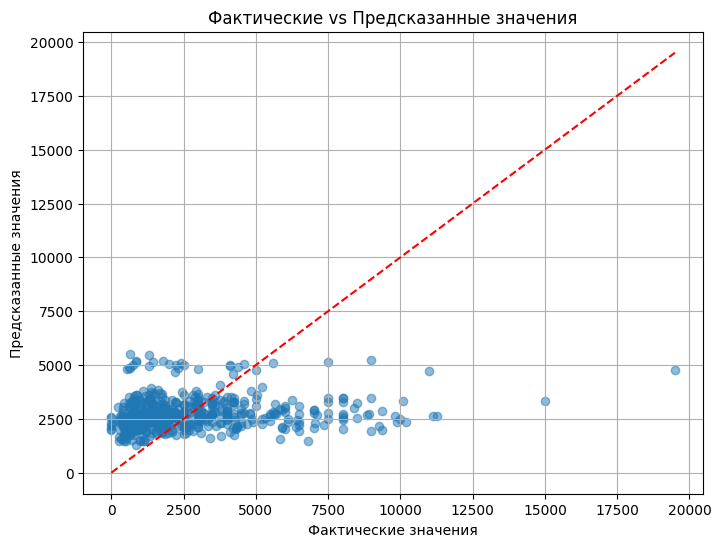

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

### 13. Остатки регрессии (Residuals Plot)

Остаток - это разница между фактическим и предсказанным значением (y_true - y_pred).

Этот график помогает проверить важное предположение линейной регрессии: что остатки случайны и не имеют паттернов.

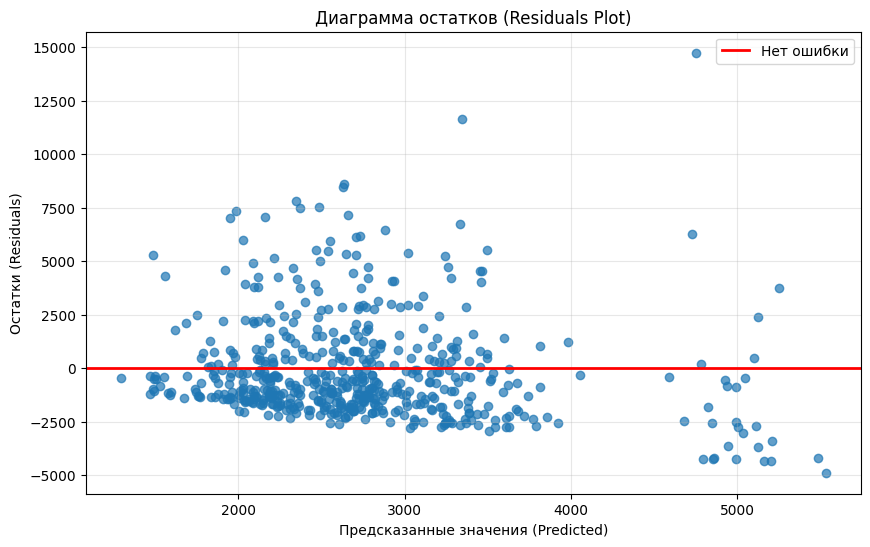

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='-', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()